### Prepare catalog

In [1]:
# for autocompletion disable the autocompletion tool 'jedi'
%config Completer.use_jedi = False

from siphon.catalog import TDSCatalog

In [10]:
# Catalog https://thredds.ucar.edu/thredds/catalog/grib/NCEP/GFS/Global_0p25deg/catalog.html
best_gfs = TDSCatalog(
    catalog_url="http://thredds.ucar.edu/thredds/catalog/grib/NCEP/GFS/"
    "Global_0p25deg/catalog.xml?dataset=grib/NCEP/GFS/Global_0p25deg/Best"
)

# Give out the name of the dataset
best_gfs.datasets

['Best GFS Quarter Degree Forecast Time Series']

In [11]:
# Pull out the dataset
best_ds = list(best_gfs.datasets.values())[0]
best_ds

Best GFS Quarter Degree Forecast Time Series

In [4]:
# Call subset() to prepare a request of a subset of the data
# by calling subset() you open the remote dataset and get a client for talking to service
ncss1 = best_ds.subset()  # ncss = netcdf subset service

# Look at the subset object variables to see what data are available from the dataset
ncss1.variables

{'Absolute_vorticity_isobaric',
 'Albedo_surface_Mixed_intervals_Average',
 'Apparent_temperature_height_above_ground',
 'Best_4_layer_Lifted_Index_surface',
 'Categorical_Freezing_Rain_surface',
 'Categorical_Freezing_Rain_surface_Mixed_intervals_Average',
 'Categorical_Ice_Pellets_surface',
 'Categorical_Ice_Pellets_surface_Mixed_intervals_Average',
 'Categorical_Rain_surface',
 'Categorical_Rain_surface_Mixed_intervals_Average',
 'Categorical_Snow_surface',
 'Categorical_Snow_surface_Mixed_intervals_Average',
 'Cloud_Work_Function_entire_atmosphere_single_layer_Mixed_intervals_Average',
 'Cloud_mixing_ratio_hybrid',
 'Cloud_mixing_ratio_isobaric',
 'Cloud_water_entire_atmosphere_single_layer',
 'Composite_reflectivity_entire_atmosphere',
 'Convective_Precipitation_Rate_surface_Mixed_intervals_Average',
 'Convective_available_potential_energy_pressure_difference_layer',
 'Convective_available_potential_energy_surface',
 'Convective_inhibition_pressure_difference_layer',
 'Convective_

In [5]:
# How many variables are in the dataset?
len(list(ncss1.variables))

170

## Prepare query

In [2]:
from datetime import datetime

In [7]:
# Use the ncss object to create a new query object, which facilitates asking for data from the server.
query1 = ncss1.query()

### Set extent, time, variables

In [8]:
# Full extent
fe_West = 0
fe_East = 360
fe_South = -90
fe_North = 90

In [9]:
# Bounding Box for a small area
sa_West = 14.8
sa_East = 156.4
sa_South = -55.6
sa_North = 47

# Query a certain area and take the datetime closest to the actual datetime
query1.lonlat_box(west=sa_West, east=sa_East, south=sa_South, north=sa_North).time(
    datetime.utcnow()
)

time=2021-05-04T15%3A05%3A31.774990&west=14.8&east=156.4&south=-55.6&north=47

In [10]:
# Set data format to be accepted, here netcdf4
query1.accept("netcdf4")  # csv

time=2021-05-04T15%3A05%3A31.774990&west=14.8&east=156.4&south=-55.6&north=47&accept=netcdf4

In [11]:
# Set target variable
query1.variables(
    "Wind_speed_gust_surface",
    #    "Geopotential_height_maximum_wind",
    #    "Temperature_maximum_wind",
)

var=Wind_speed_gust_surface&time=2021-05-04T15%3A05%3A31.774990&west=14.8&east=156.4&south=-55.6&north=47&accept=netcdf4

## Query and visualize data

In [3]:
import netCDF4
from xarray.backends import NetCDF4DataStore
import xarray as xr

In [13]:
# Send request and open the received virtual data as xarray dataset
data1 = ncss1.get_data(query1)
data1 = xr.open_dataset(NetCDF4DataStore(data1))
data1

<xarray.Dataset>
Dimensions:                  (lat: 411, lon: 568, time: 1)
Coordinates:
    reftime                  (time) datetime64[ns] ...
  * time                     (time) datetime64[ns] 2021-05-04T15:00:00
  * lat                      (lat) float32 47.0 46.75 46.5 ... -55.25 -55.5
  * lon                      (lon) float32 14.75 15.0 15.25 ... 156.2 156.5
Data variables:
    Wind_speed_gust_surface  (time, lat, lon) float32 ...
    LatLon_Projection        int32 ...
Attributes: (12/13)
    Originating_or_generating_Center:                                        ...
    Originating_or_generating_Subcenter:                                     ...
    GRIB_table_version:                                                      ...
    Type_of_generating_process:                                              ...
    Analysis_or_forecast_generating_process_identifier_defined_by_originating...
    Conventions:                                                             ...
    ...                                                                                ...
    featureType:                                                             ...
    History:                                                                 ...
    geospatial_lat_min:                                                      ...
    geospatial_lat_max:                                                      ...
    geospatial_lon_min:                                                      ...
    geospatial_lon_max:                                                      ...

In [14]:
# Download the data as netCDF
# toFile = data1.to_netcdf("Wind1.nc")

In [15]:
# We want to inpect the variable Wind_speed_gust_surface
wind_3d = data1.Wind_speed_gust_surface
wind_3d

<xarray.DataArray 'Wind_speed_gust_surface' (time: 1, lat: 411, lon: 568)>
[233448 values with dtype=float32]
Coordinates:
    reftime  (time) datetime64[ns] 2021-05-04T06:00:00
  * time     (time) datetime64[ns] 2021-05-04T15:00:00
  * lat      (lat) float32 47.0 46.75 46.5 46.25 ... -54.75 -55.0 -55.25 -55.5
  * lon      (lon) float32 14.75 15.0 15.25 15.5 ... 155.8 156.0 156.2 156.5
Attributes:
    long_name:                      Wind speed (gust) @ Ground or water surface
    units:                          m/s
    abbreviation:                   GUST
    grid_mapping:                   LatLon_Projection
    Grib_Variable_Id:               VAR_0-2-22_L1
    Grib2_Parameter:                [ 0  2 22]
    Grib2_Parameter_Discipline:     Meteorological products
    Grib2_Parameter_Category:       Momentum
    Grib2_Parameter_Name:           Wind speed (gust)
    Grib2_Level_Type:               1
    Grib2_Level_Desc:               Ground or water surface
    Grib2_Generating_Process_Type:  Forecast

In [4]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
# import cartopy.feature as cfeature
# from metpy.plots import ctables

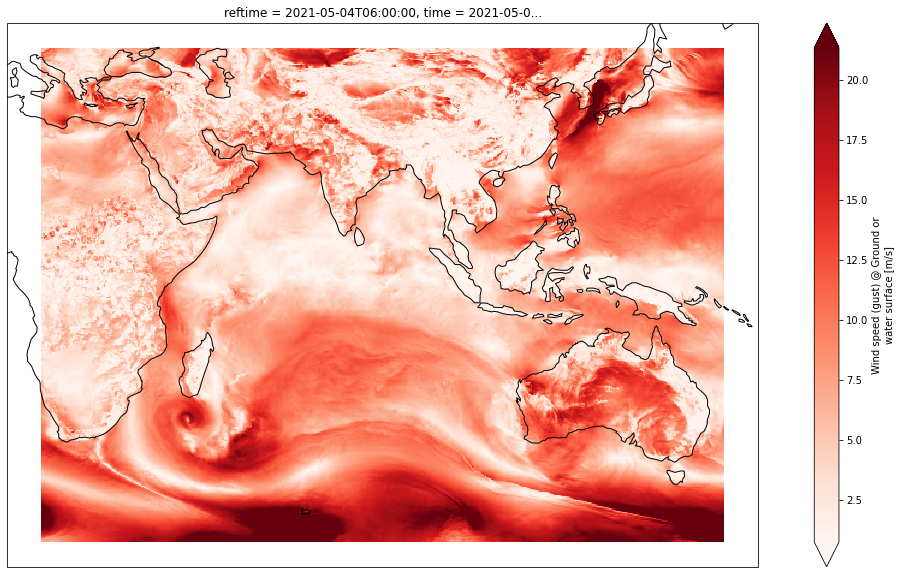

In [17]:
fig = plt.figure(figsize=(20, 10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
p = wind_3d.isel(time=0).plot(transform=ccrs.PlateCarree(), robust=True, cmap="Reds")

### Surface temperature Spain

In [18]:
# Bounding Box for a small area west of the meridian
w_West = -10.90 + 360
w_East = 360
w_South = 27.76
w_North = 49.78

ncssW = best_ds.subset()

queryW = ncssW.query()

queryW.lonlat_box(north=w_North, south=w_South, east=w_East, west=w_West).time(
    datetime.utcnow()
)

queryW.accept("netcdf4")
queryW.variables('Temperature_surface')

dataW = ncssW.get_data(queryW)
dataW = xr.open_dataset(NetCDF4DataStore(dataW))
dataW

<xarray.Dataset>
Dimensions:              (lat: 89, lon: 44, time: 1)
Coordinates:
    reftime              (time) datetime64[ns] ...
  * time                 (time) datetime64[ns] 2021-05-04T15:00:00
  * lat                  (lat) float32 49.75 49.5 49.25 ... 28.25 28.0 27.75
  * lon                  (lon) float32 349.0 349.2 349.5 ... 359.2 359.5 359.8
Data variables:
    Temperature_surface  (time, lat, lon) float32 ...
    LatLon_Projection    int32 ...
Attributes: (12/13)
    Originating_or_generating_Center:                                        ...
    Originating_or_generating_Subcenter:                                     ...
    GRIB_table_version:                                                      ...
    Type_of_generating_process:                                              ...
    Analysis_or_forecast_generating_process_identifier_defined_by_originating...
    Conventions:                                                             ...
    ...                                                                                ...
    featureType:                                                             ...
    History:                                                                 ...
    geospatial_lat_min:                                                      ...
    geospatial_lat_max:                                                      ...
    geospatial_lon_min:                                                      ...
    geospatial_lon_max:                                                      ...

In [19]:
wind3DW = dataW.Temperature_surface

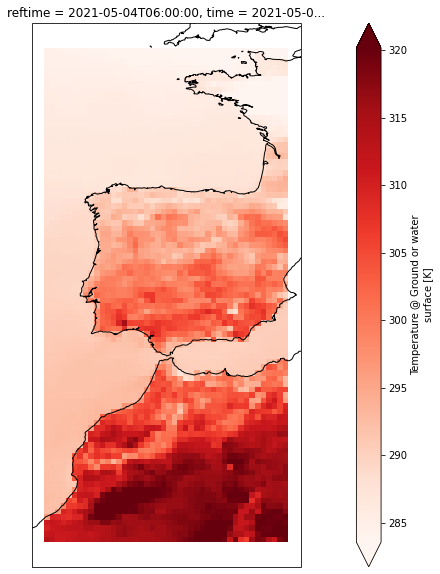

In [20]:
fig = plt.figure(figsize=(20, 10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
p = wind3DW.isel(time=0).plot(transform=ccrs.PlateCarree(), robust=True, cmap="Reds")

### Ice coverage north of Scandinavia

In [21]:
# Bounding Box for a small area east of the meridian
e_West = 0
e_East = 50
e_South = 50
e_North = 90

ncssE = best_ds.subset()

queryE = ncssE.query()

queryE.lonlat_box(north=e_North, south=e_South, east=e_East, west=e_West).time(
    datetime.utcnow()
)

queryE.accept("netcdf4")
queryE.variables("Ice_cover_surface")

dataE = ncssE.get_data(queryE)
dataE = xr.open_dataset(NetCDF4DataStore(dataE))
dataE

<xarray.Dataset>
Dimensions:            (lat: 161, lon: 201, time: 1)
Coordinates:
    reftime            (time) datetime64[ns] ...
  * time               (time) datetime64[ns] 2021-05-04T15:00:00
  * lat                (lat) float32 90.0 89.75 89.5 89.25 ... 50.5 50.25 50.0
  * lon                (lon) float32 0.0 0.25 0.5 0.75 ... 49.25 49.5 49.75 50.0
Data variables:
    Ice_cover_surface  (time, lat, lon) float32 ...
    LatLon_Projection  int32 ...
Attributes: (12/13)
    Originating_or_generating_Center:                                        ...
    Originating_or_generating_Subcenter:                                     ...
    GRIB_table_version:                                                      ...
    Type_of_generating_process:                                              ...
    Analysis_or_forecast_generating_process_identifier_defined_by_originating...
    Conventions:                                                             ...
    ...                                                                                ...
    featureType:                                                             ...
    History:                                                                 ...
    geospatial_lat_min:                                                      ...
    geospatial_lat_max:                                                      ...
    geospatial_lon_min:                                                      ...
    geospatial_lon_max:                                                      ...

In [22]:
wind3DE = dataE.Ice_cover_surface
wind3DE

<xarray.DataArray 'Ice_cover_surface' (time: 1, lat: 161, lon: 201)>
array([[[1., 1., ..., 1., 1.],
        [1., 1., ..., 1., 1.],
        ...,
        [0., 0., ..., 0., 0.],
        [0., 0., ..., 0., 0.]]], dtype=float32)
Coordinates:
    reftime  (time) datetime64[ns] 2021-05-04T06:00:00
  * time     (time) datetime64[ns] 2021-05-04T15:00:00
  * lat      (lat) float32 90.0 89.75 89.5 89.25 89.0 ... 50.75 50.5 50.25 50.0
  * lon      (lon) float32 0.0 0.25 0.5 0.75 1.0 ... 49.0 49.25 49.5 49.75 50.0
Attributes:
    long_name:                      Ice cover @ Ground or water surface
    units:                          
    abbreviation:                   ICEC
    grid_mapping:                   LatLon_Projection
    Grib_Variable_Id:               VAR_10-2-0_L1
    Grib2_Parameter:                [10  2  0]
    Grib2_Parameter_Discipline:     Oceanographic products
    Grib2_Parameter_Category:       Ice
    Grib2_Parameter_Name:           Ice cover
    Grib2_Level_Type:               1
    Grib2_Level_Desc:               Ground or water surface
    Grib2_Generating_Process_Type:  Forecast

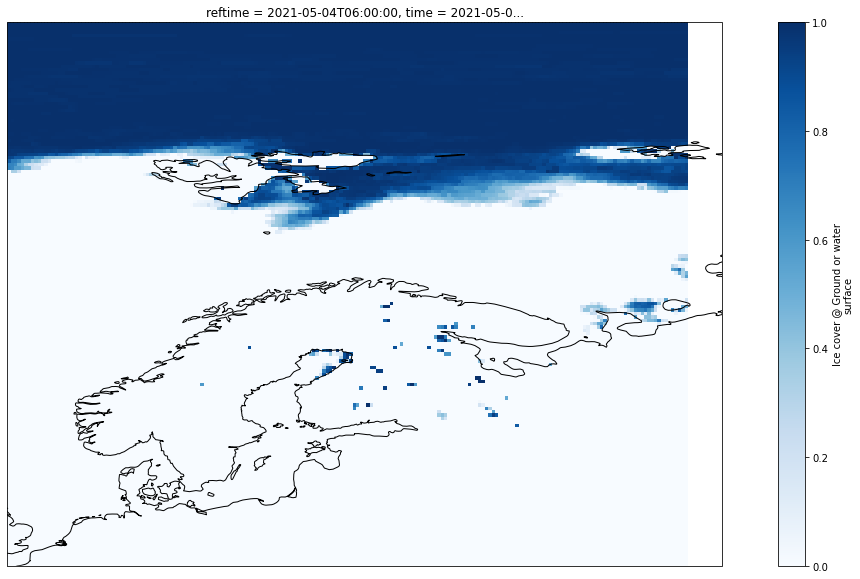

In [23]:
fig = plt.figure(figsize=(20, 10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
p = wind3DE.isel(time=0).plot(transform=ccrs.PlateCarree(), robust=True, cmap="Blues")

### Worldwide landcover

In [24]:
# Full extent
fe_West = 0
fe_East = 360
fe_South = -90
fe_North = 90

In [33]:
ncss = best_ds.subset()

query = ncss.query()

query.lonlat_box(north=fe_North, south=fe_South, east=fe_East, west=fe_West).time(
    datetime.utcnow()
)

query.accept("netcdf4")
query.variables('Land_cover_0__sea_1__land_surface')

data = ncss.get_data(query)
data = xr.open_dataset(NetCDF4DataStore(data))
data

<xarray.Dataset>
Dimensions:                            (lat: 721, lon: 1440, time: 1)
Coordinates:
    reftime                            (time) datetime64[ns] ...
  * time                               (time) datetime64[ns] 2021-05-02T15:00:00
  * lat                                (lat) float32 90.0 89.75 ... -89.75 -90.0
  * lon                                (lon) float32 0.0 0.25 ... 359.5 359.8
Data variables:
    Land_cover_0__sea_1__land_surface  (time, lat, lon) float32 ...
    LatLon_Projection                  int32 ...
Attributes: (12/13)
    Originating_or_generating_Center:                                        ...
    Originating_or_generating_Subcenter:                                     ...
    GRIB_table_version:                                                      ...
    Type_of_generating_process:                                              ...
    Analysis_or_forecast_generating_process_identifier_defined_by_originating...
    Conventions:                                                             ...
    ...                                                                                ...
    featureType:                                                             ...
    History:                                                                 ...
    geospatial_lat_min:                                                      ...
    geospatial_lat_max:                                                      ...
    geospatial_lon_min:                                                      ...
    geospatial_lon_max:                                                      ...

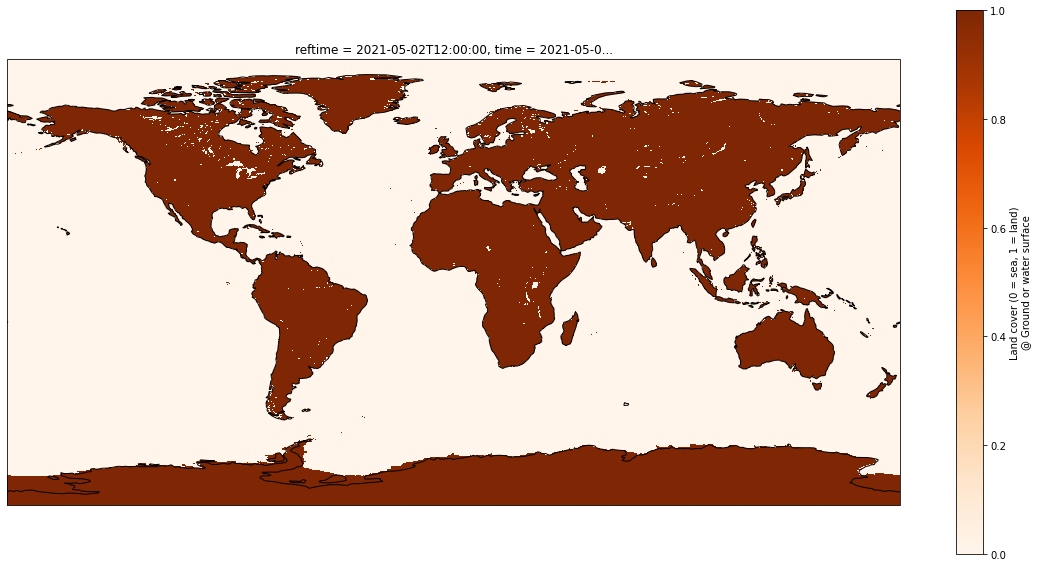

In [34]:
wind3D = data.Land_cover_0__sea_1__land_surface
wind3D
fig = plt.figure(figsize=(20, 10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
p = wind3D.isel(time=0).plot(transform=ccrs.PlateCarree(), robust=True, cmap="Oranges")

### Multiple variables

In [22]:
w_West = 0
w_East = 360
w_South = -90
w_North = 90

ncss = best_ds.subset()

query = ncss.query()

query.lonlat_box(north=w_North, south=w_South, east=w_East, west=w_West).time(
#     20210502-03:00:00 # start time cmems
    datetime.utcnow()
#     datetime(2021, 5, 2, 15, 30, 41, 597199)
)

query.accept("netcdf4")
# Set target variable
query.variables(
    "Wind_speed_gust_surface",
    "Geopotential_height_maximum_wind",
    "Temperature_maximum_wind",
    'Temperature_surface'
)

data = ncss.get_data(query)
data = xr.open_dataset(NetCDF4DataStore(data))
data

#toFile = data1.to_netcdf("data/GFS/.nc")


# wind = data.Wind_speed_gust_surface
# height = data.Geopotential_height_maximum_wind
# cloud = data.Low_cloud_cover_low_cloud

# fig = plt.figure(figsize=(20, 10))
# ax1 = plt.axes(projection=ccrs.PlateCarree())
# ax1.coastlines()
# p = wind.isel(time=0).plot(transform=ccrs.PlateCarree(), robust=True, cmap="Greens")


<xarray.Dataset>
Dimensions:                           (lat: 721, lon: 1440, time1: 1)
Coordinates:
    reftime1                          (time1) datetime64[ns] ...
  * time1                             (time1) datetime64[ns] 2021-05-07T09:00:00
  * lat                               (lat) float32 90.0 89.75 ... -89.75 -90.0
  * lon                               (lon) float32 0.0 0.25 0.5 ... 359.5 359.8
Data variables:
    Wind_speed_gust_surface           (time1, lat, lon) float32 ...
    LatLon_Projection                 int32 ...
    Geopotential_height_maximum_wind  (time1, lat, lon) float32 ...
    Temperature_surface               (time1, lat, lon) float32 ...
    Temperature_maximum_wind          (time1, lat, lon) float32 ...
Attributes: (12/13)
    Originating_or_generating_Center:                                        ...
    Originating_or_generating_Subcenter:                                     ...
    GRIB_table_version:                                                      ...
    Type_of_generating_process:                                              ...
    Analysis_or_forecast_generating_process_identifier_defined_by_originating...
    Conventions:                                                             ...
    ...                                                                                ...
    featureType:                                                             ...
    History:                                                                 ...
    geospatial_lat_min:                                                      ...
    geospatial_lat_max:                                                      ...
    geospatial_lon_min:                                                      ...
    geospatial_lon_max:                                                      ...

In [53]:
# data
filename = "data/GFS/GFS_" + str(data.time1.reftime1.values[0])[0:10] + ".nc"
filename

toFile = data.to_netcdf(filename)